In [82]:
#First, we import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

#Then, we load datasets
df_vaccinations = pd.read_csv("country_vaccinations.csv")
df_manufacturer = pd.read_csv("country_vaccinations_by_manufacturer.csv")

In [83]:
# Introducing the dataset for clarity and inaccuracies
print("COVID-19 World Vaccination Progress Dataset")
print("=")
print("The dataset provides information on the global vaccination progress against COVID-19.")
print("It consists of two main files: 'country_vaccinations.csv' and 'country_vaccinations_by_manufacturer.csv'.")
print("'country_vaccinations.csv' includes daily vaccination data and statistics by different vaccines used in various countries.")
print("'country_vaccinations_by_manufacturer.csv' provides details on the number of vaccine doses delivered by different manufacturers.")
print("\n")

# Showcasing 'country_vaccinations.csv' dataset
print("Head of 'country_vaccinations.csv' dataset:")
print("============")
print(df_vaccinations.head())
print("\n")

COVID-19 World Vaccination Progress Dataset
=
The dataset provides information on the global vaccination progress against COVID-19.
It consists of two main files: 'country_vaccinations.csv' and 'country_vaccinations_by_manufacturer.csv'.
'country_vaccinations.csv' includes daily vaccination data and statistics by different vaccines used in various countries.
'country_vaccinations_by_manufacturer.csv' provides details on the number of vaccine doses delivered by different manufacturers.


Head of 'country_vaccinations.csv' dataset:
       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN

Dataset Summary:



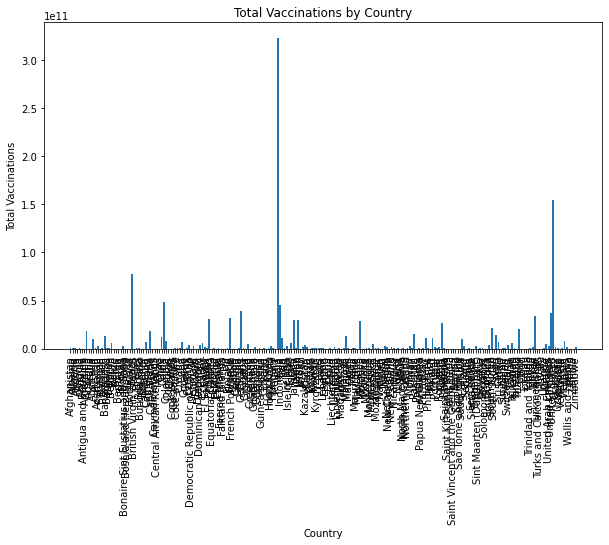

In [84]:
# Dataset Graph
print("Dataset Summary:")
print("")
df_summary = df_vaccinations[['country', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].dropna()
df_summary = df_summary.groupby('country').sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(df_summary['country'], df_summary['total_vaccinations'])
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations by Country')
plt.xticks(rotation=90)
plt.show()

In [85]:
# Importing plotly to visualise using Treemap, since the above visualisations don't provide clarity
import plotly.express as px

fig = px.treemap(df_summary, path=['country'], values='total_vaccinations',
                  title='Total Vaccinations by Country (Treemap)',
                  color='total_vaccinations',
                  color_continuous_scale='Blues')
fig.show()


C:\Users\Syed Fahad\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



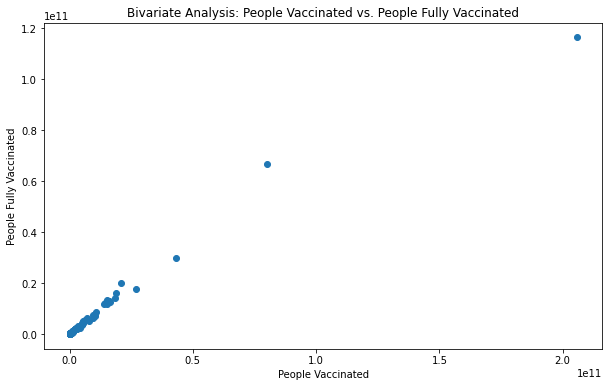

In [86]:
# Bivariate analysis - Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_summary['people_vaccinated'], df_summary['people_fully_vaccinated'])
plt.xlabel('People Vaccinated')
plt.ylabel('People Fully Vaccinated')
plt.title('Bivariate Analysis: People Vaccinated vs. People Fully Vaccinated')
plt.show()

In [87]:
# Identifiying key challenges and its description
print("Challenges to be Addressed:")
print("=====")
print("1. Noisy Data: The dataset may contain errors, inconsistencies, and missing values.")
print("2. Data Completeness: Different countries have varying levels of reporting accuracy, leading to incomplete data entries.")
print("\n")

# Summarising through statistics
print("Summary Statistics:")
print("=")
total_vaccinations = df_vaccinations['total_vaccinations'].sum()
people_vaccinated = df_vaccinations['people_vaccinated'].sum()
people_fully_vaccinated = df_vaccinations['people_fully_vaccinated'].sum()
print("Total number of vaccinations worldwide:", total_vaccinations)
print("Total number of people vaccinated worldwide:", people_vaccinated)
print("Total number of people fully vaccinated worldwide:", people_fully_vaccinated)
print("\n")

Challenges to be Addressed:
=====
1. Noisy Data: The dataset may contain errors, inconsistencies, and missing values.
2. Data Completeness: Different countries have varying levels of reporting accuracy, leading to incomplete data entries.


Summary Statistics:
=
Total number of vaccinations worldwide: 2002854013761.0
Total number of people vaccinated worldwide: 731113482252.0
Total number of people fully vaccinated worldwide: 548594310708.0




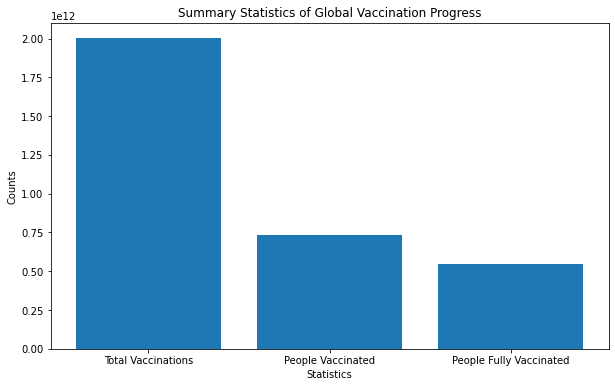

In [88]:
# Visualising Summary Statistics through Bar graph - 
statistics = ['Total Vaccinations', 'People Vaccinated', 'People Fully Vaccinated']
counts = [total_vaccinations, people_vaccinated, people_fully_vaccinated]
plt.figure(figsize=(10, 6))
plt.bar(statistics, counts)
plt.xlabel('Statistics')
plt.ylabel('Counts')
plt.title('Summary Statistics of Global Vaccination Progress')
plt.show()

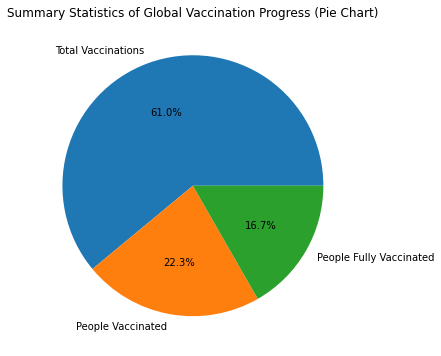

In [89]:
# Pie chart - Summary Statistics
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=statistics, autopct='%1.1f%%')
plt.title('Summary Statistics of Global Vaccination Progress (Pie Chart)')
plt.show()

Unsupervised Analysis - K-means Clustering:
=


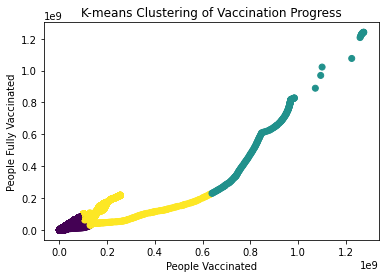

Head of 'country_vaccinations.csv' dataset with clusters:
    people_vaccinated  people_fully_vaccinated  cluster
78           448878.0                  55624.0        0
87           470341.0                  77560.0        0
91           476367.0                  96910.0        0
93           479372.0                 111082.0        0
94           479574.0                 113739.0        0


Correlation Heatmap:
=


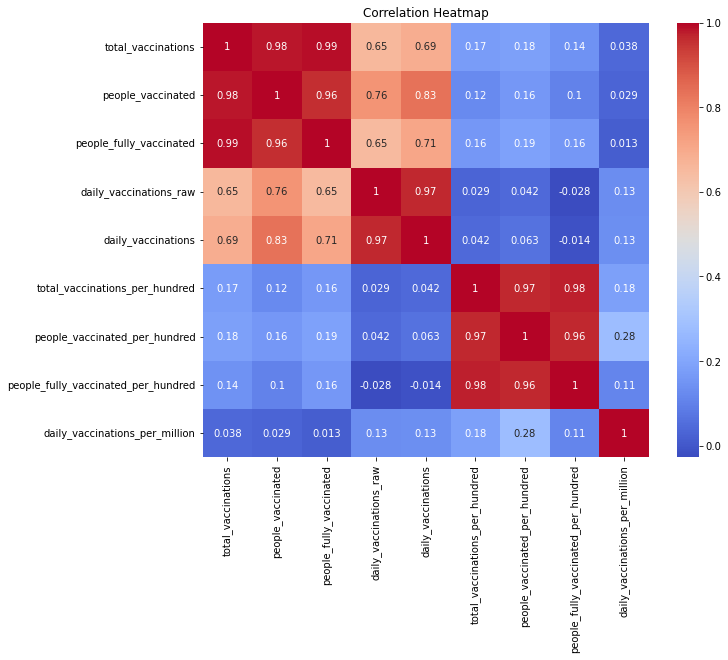

In [90]:
# Performing unsupervised analysis through K-means clustering
print("Unsupervised Analysis - K-means Clustering:")
print("=")
df_cluster = df_vaccinations[['people_vaccinated', 'people_fully_vaccinated']].dropna()
X = df_cluster.values
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
df_cluster['cluster'] = kmeans.labels_

# Visualizations, first through scatter plot with clusters
plt.scatter(df_cluster['people_vaccinated'], df_cluster['people_fully_vaccinated'], c=df_cluster['cluster'], cmap='viridis')
plt.xlabel('People Vaccinated')
plt.ylabel('People Fully Vaccinated')
plt.title('K-means Clustering of Vaccination Progress')
plt.show()

print("Head of 'country_vaccinations.csv' dataset with clusters:")
print("===========================================")
print(df_cluster.head())
print("\n")

# Visualization with a correlation heatmap
print("Correlation Heatmap:")
print("=")
plt.figure(figsize=(10, 8))
sns.heatmap(df_vaccinations.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Supervised Analysis - Linear Regression:
=


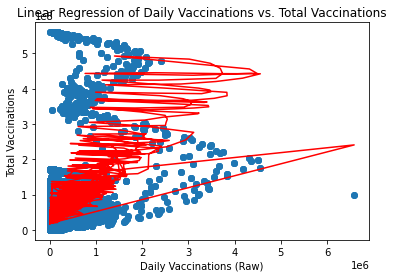

Coefficients: [ -4.36511452 137.02072325]
Intercept: 18412684.129690953




In [91]:
# Moving on to supervised analysis by conducting Linear regression
print("Supervised Analysis - Linear Regression:")
print("=")
df_regression = df_vaccinations.merge(df_manufacturer, left_on=['country', 'date'], right_on=['location', 'date'], how='inner').dropna(subset=['daily_vaccinations_raw', 'daily_vaccinations'])
X_reg = df_regression[['daily_vaccinations_raw', 'daily_vaccinations']]
y_reg = df_regression['total_vaccinations_x']
regression_model = LinearRegression()
regression_model.fit(X_reg, y_reg)

# Visualization with scatter plot with regression line
plt.scatter(X_reg['daily_vaccinations_raw'], y_reg)
plt.plot(X_reg['daily_vaccinations_raw'], regression_model.predict(X_reg), color='red')
plt.xlabel('Daily Vaccinations (Raw)')
plt.ylabel('Total Vaccinations')
plt.title('Linear Regression of Daily Vaccinations vs. Total Vaccinations')
plt.show()

print("Coefficients:", regression_model.coef_)
print("Intercept:", regression_model.intercept_)
print("\n")

In [92]:
# Final reflections on methodology
print("Reflection on Methods Used:")
print("-")
print("The summary statistics provided a snapshot of the global vaccination progress.")
print("K-means clustering helped identify clusters of countries with similar vaccination patterns, offering insights into successful vaccination campaigns and potential challenges.")
print("Linear regression allowed us to analyze the relationship between daily vaccination numbers and overall vaccination progress, providing insights into the effectiveness of vaccination efforts.")
print("\n")

Reflection on Methods Used:
-
The summary statistics provided a snapshot of the global vaccination progress.
K-means clustering helped identify clusters of countries with similar vaccination patterns, offering insights into successful vaccination campaigns and potential challenges.
Linear regression allowed us to analyze the relationship between daily vaccination numbers and overall vaccination progress, providing insights into the effectiveness of vaccination efforts.




In [93]:
#Summarised Results
numeric_results = {
    "Total Vaccinations Worldwide": total_vaccinations,
    "Total People Vaccinated Worldwide": people_vaccinated,
    "Total People Fully Vaccinated Worldwide": people_fully_vaccinated,
    "Linear Regression Coefficients": regression_model.coef_,
    "Linear Regression Intercept": regression_model.intercept_
}

print("\nNumeric Results:")
print("========")
for key, value in numeric_results.items():
    print(key + ":", value)


Numeric Results:
Total Vaccinations Worldwide: 2002854013761.0
Total People Vaccinated Worldwide: 731113482252.0
Total People Fully Vaccinated Worldwide: 548594310708.0
Linear Regression Coefficients: [ -4.36511452 137.02072325]
Linear Regression Intercept: 18412684.129690953


In [94]:
# References 
print("References:")
print("-------")
print("COVID-19 World Vaccination Progress Dataset. Retrieved from Kaggle: https://www.kaggle.com/gpreda/covid-world-vaccination-progress")

References:
-------
COVID-19 World Vaccination Progress Dataset. Retrieved from Kaggle: https://www.kaggle.com/gpreda/covid-world-vaccination-progress
